In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import time
import librosa
import librosa.display

In [2]:
import tensorflow as tf

/Users/shashvatkedia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
data,sampling_rate = librosa.load('dataset/sounds/2022.wav')

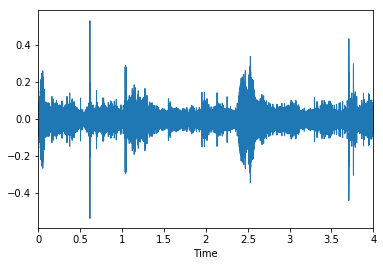

In [11]:
librosa.display.waveplot(data, sr=sampling_rate)

In [13]:
os.listdir()

['.DS_Store',
 'LICENSE',
 'dataset',
 'Sound Classification.ipynb',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git']

In [15]:
dataset = pd.read_csv('dataset/train.csv')

In [16]:
dataset.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [23]:
dataset['Class'].value_counts()

jackhammer          668
engine_idling       624
siren               607
dog_bark            600
drilling            600
children_playing    600
air_conditioner     600
street_music        600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [46]:
X = np.empty((0,40),np.float32)
y = []
starttime = time.time()
for index,row in dataset.iterrows():
    sound_file_path = 'dataset/sounds/' + str(row['ID']) + '.wav'
    features, sample_rate = librosa.load(sound_file_path,res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=features,sr=sample_rate,n_mfcc=40).T,axis=0)
    X = np.vstack([X, mfccs])
    y.append(row['Class'])
endtime = time.time()
print("Total time for feature extraction")
print(endtime - starttime)

Total time for feature extraction
340.09247398376465


In [47]:
X.shape

(5435, 40)

In [48]:
y = np.array(y)
y.shape

(5435,)

In [51]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [52]:
labelEncoder = LabelEncoder()
y = np_utils.to_categorical(labelEncoder.fit_transform(y))

NameError: name 'np_utils' is not defined